<a href="https://colab.research.google.com/github/Torresgg/ventas-data-miner/blob/main/ventadataminer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ventas data miner**

*Se trata de un conjunto de datos transaccionales que contiene
todas las transacciones ocurridas entre el 01/12/2010 y el
09/12/2011 para un comercio minorista en línea sintienda
física registrado y con sede en el Reino Unido.*

***Información adicional:*** *Se trata de un conjunto de datos transaccionales que contiene todas las transacciones que se produjeron entre el 1 de diciembre de 2010 y el 9 de diciembre de 2011 para una empresa minorista en línea sin establecimientos físicos registrada y con sede en el Reino Unido. La empresa vende principalmente regalos exclusivos para cualquier ocasión.*

# **Importación de librerias y carga de datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colormaps
from datetime import datetime

# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)
# Ver las primeras filas del DataFrame
print(data.head())
print(data.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.1563860

# **Limpieza de los datos**

In [ ]:
# Eliminar filas con valores nulos en columnas críticas
data.dropna(subset=['InvoiceNo', 'Description', 'Quantity', 'UnitPrice'], inplace=True)
# Filtrar solo las transacciones positivas (ventas)
data = data[data['Quantity'] > 0]
# Convertir la columna 'InvoiceDate' a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Verificar los cambios
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 530693 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530693 non-null  object        
 1   StockCode    530693 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     530693 non-null  int64         
 4   InvoiceDate  530693 non-null  datetime64[ns]
 5   UnitPrice    530693 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      530693 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB
None


# **Preprocesamiento**

1.   Identificar los productos más vendidos
2.   Analizar las tendencias de ventas a lo largo del tiempo
3.   Evaluar el rendimiento por categoría de producto
4.   Identificar patrones de compra por cliente
5.  Conclusiones

# **1.Identificar los productos más vendidos**

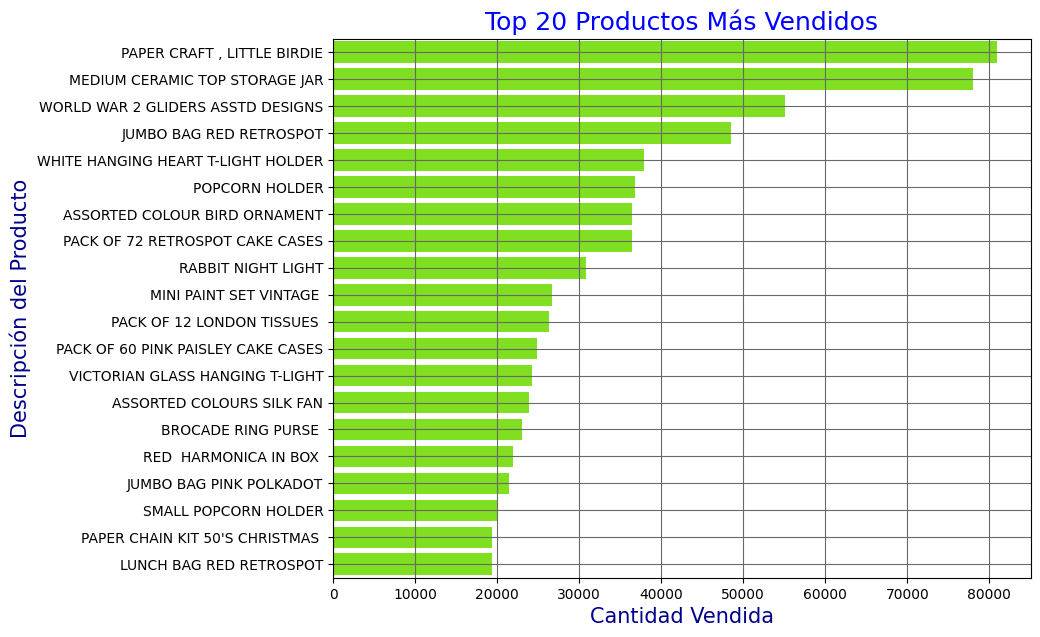

In [ ]:
# Agrupar por 'Description' y sumar las 'Quantity'
productos_sold = data.groupby('Description')['Quantity'].sum().reset_index()

# Ordenar los productos por cantidad vendida
top_productos = productos_sold.sort_values(by='Quantity', ascending=False).head(20)

# Visualizar los productos más vendidos
plt.figure(figsize=(9, 7))
sns.barplot(x='Quantity', y='Description', data=top_productos, color= 'chartreuse')
plt.rcParams['figure.figsize'] = [8, 4]
plt.title('Top 20 Productos Más Vendidos', color= 'blue', fontsize=18)
plt.xlabel('Cantidad Vendida',color= 'darkblue', fontsize=15)
plt.ylabel('Descripción del Producto', color= 'darkblue', fontsize=15)
plt.grid(color= 'dimgray')
plt.show()

***La gráfica muestra los 20 productos más vendidos, el lider de la tabla posee más de 80,000 unidades. Los siguientes productos más destacados tienen entre 30,000 y 50,000 unidades vendidas, mostrando una clara concentración de ventas en ciertos artículos. Esto sugiere que algunos productos son muchomás populares o esenciales en comparación con el resto.***

#**2. Analisis de la tendencia de ventas a lo largo del tiempo**

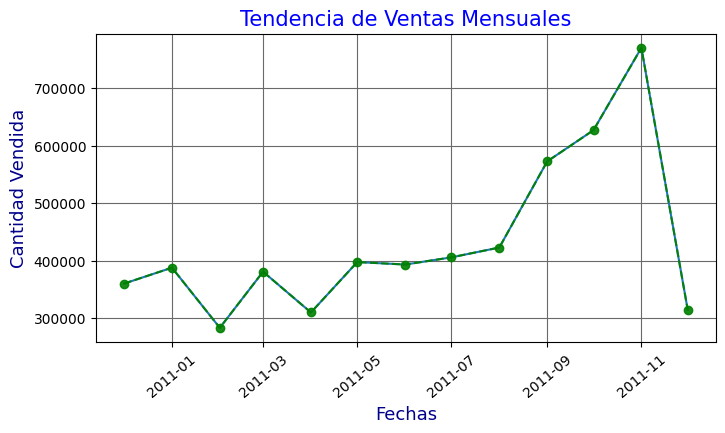

In [ ]:
# Crear una columna para el año y mes
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Agrupar por mes y sumar las cantidades vendidas
ventas_mensuales = data.groupby('YearMonth')['Quantity'].sum().reset_index()

# Convertir YearMonth a datetime para la visualización
ventas_mensuales['YearMonth'] = ventas_mensuales['YearMonth'].dt.to_timestamp()

# Visualizar la tendencia de ventas mensuales
plt.xticks(rotation=40)
sns.lineplot(x='YearMonth', y='Quantity', data=ventas_mensuales)
plt.rcParams['figure.figsize'] = [8, 4]
plt.plot(ventas_mensuales['YearMonth'], ventas_mensuales['Quantity'], linestyle='--', marker='o', color= 'green', alpha=0.9, label='YearMonth')
plt.title('Tendencia de Ventas Mensuales', color= 'blue', fontsize=15)
plt.xlabel('Fechas', color= 'darkblue', fontsize=13)
plt.ylabel('Cantidad Vendida', color= 'darkblue', fontsize=13)
plt.grid(color= 'dimgray')
plt.show()

***La gráfica evidencia una tendencia creciente en las ventas mensuales durante 2011, con su pico más alto en octubre.
Sin embargo, en noviembre, las ventas caen abruptamente. Esto podría deberse a  diversos factores como problemas
logísticos o cambios en la demanda.***

# **3. Evaluar el rendimiento por categoría de producto**

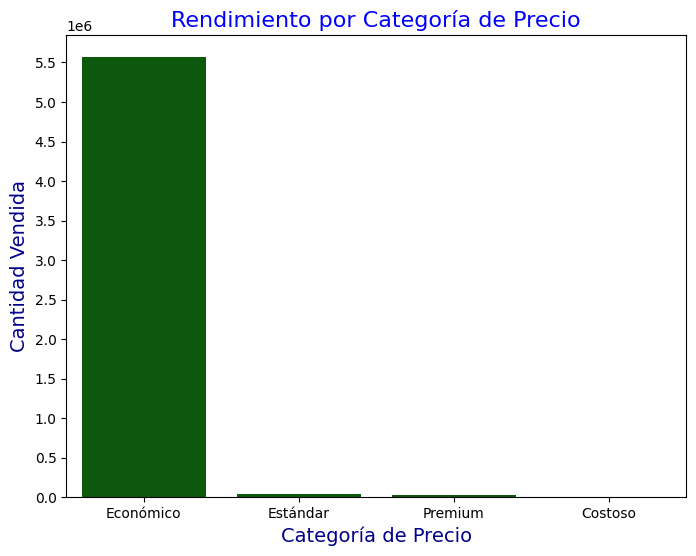

In [ ]:
# Función para categorizar productos según rangos de precios en escalas de 20
def categorizar_precio(precio):
    if precio < 10:
        return 'Económico'
    elif 11 <= precio < 30:
        return 'Estándar'
    elif 31 <= precio < 60:
        return 'Costoso'
    else:
        return 'Premium'

# Crear la columna de categorías basadas en precios
data['Categoria'] = data['UnitPrice'].apply(categorizar_precio)

# Agrupar los datos por categoría y sumar las cantidades vendidas
categoria_rendimiento = data.groupby('Categoria')['Quantity'].sum().reset_index()
categoria_rendimiento = categoria_rendimiento.sort_values(by='Quantity', ascending=False)

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(8, 6))
sns.color_palette("pastel")
sns.barplot(x='Categoria', y='Quantity', data=categoria_rendimiento, color= 'darkgreen')
plt.title('Rendimiento por Categoría de Precio', fontsize=16, color= 'blue')
plt.xlabel('Categoría de Precio', fontsize=14, color= 'darkblue')
plt.ylabel('Cantidad Vendida', fontsize=14, color= 'darkblue')

# Configurar intervalos en el eje Y cada 50 unidades
max_quantity = categoria_rendimiento['Quantity'].max()
plt.yticks(range(0, max_quantity, 500000))
plt.show()

***La gráfica muestra que los productos económicos representan la mayor parte de las ventas, mientras que las categorías de mayor precio tienen ventas no muy notables en comparación. Esto sugiere que la empresa  se enfoca en productos accesibles por su naturaleza, reflejando así las preferencias del mercado.***

#**4. Identificar patrones de compra por cliente**

In [ ]:
compras = [
    {"cliente_id": 1, "producto": "paper craft", "precio": 15},
    {"cliente_id": 2, "producto": "red harmica in box", "precio": 20},
    {"cliente_id": 1, "producto": "brocade ring purse", "precio": 30},
    {"cliente_id": 3, "producto": "rabbit night light", "precio": 40},
    {"cliente_id": 2, "producto": "jumbo bag red retrospot", "precio": 50}
]

# Identificar compras por cliente
compras_por_cliente = {}

for compra in compras:
    cliente_id = compra["cliente_id"]
    if cliente_id not in compras_por_cliente:
        compras_por_cliente[cliente_id] = []
    compras_por_cliente[cliente_id].append(compra)

# Imprimir compras por cliente
for cliente_id, compras in compras_por_cliente.items():
    print(f"Cliente {cliente_id} ha comprado:")
    for compra in compras:
        print(f"  - {compra['producto']} por ${compra['precio']}")

Cliente 1 ha comprado:
  - paper craft por $15
  - brocade ring purse por $30
Cliente 2 ha comprado:
  - red harmica in box por $20
  - jumbo bag red retrospot por $50
Cliente 3 ha comprado:
  - rabbit night light por $40


# **5. Conclusión**

***El análisis de ventas ha permitido identificar los productos más vendidos, lo que facilita a la tienda optimizar su inventario y centrarse en estos artículos clave. Además, se han observado variaciones en las ventas a lo largo del tiempo, posiblemente influenciadas por factores estacionales o eventos específicos, lo que es fundamental para la planificación de campañas de marketing efectivas. Al evaluar el rendimiento por categoría, se han detectado áreas de oportunidad para mejorar las ventas en categorías menos populares. Asimismo, el análisis ha revelado patrones de compra entre los clientes, lo que permite segmentar a los consumidores y personalizar las estrategias de marketing según sus comportamientos. Por último, se recomienda realizar un seguimiento continuo de estas métricas y ajustar las estrategias comerciales en función de los cambios en las tendencias y el comportamiento del cliente, asegurando así una respuesta ágil y efectiva a las dinámicas del mercado.***